# **1° Passo:** Importando bibliotecas

In [1]:
import xarray as xr
import time
import proplot as pplt
import salem
import matplotlib
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.ndimage
import os
import pandas as pd
import salem

import warnings
warnings.filterwarnings("ignore")

# **2° Passo:** Declarando funções

In [2]:
#-----------------------------------------------------------------------------------
# Função que plota os Estados
#-----------------------------------------------------------------------------------
def evm_plot_states(shapefile, cor, espessura_linha):

    """
    Retorna a plotagem dos contornos de um shapefile na figura

    Parâmetros de entrada:
                shapefile (shp): shapefile da regiao

    Parâmetros de saída:
                figura com o contorno da região baseado no shapefile fornecido
    """
    import cartopy.crs as ccrs
    import cartopy.io.shapereader as shpreader
    import matplotlib.pyplot as plt

    shapefile = list(shpreader.Reader(shapefile).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor=cor,facecolor='none', linewidth=espessura_linha)

"""
#-----------------------------------------------------------------------------------
# Função que plota as siglas
#-----------------------------------------------------------------------------------
def plot_siglas_statesb():

    color = 'gray'

    ax.annotate('RS', xy=(-54.0, -30.0),fontsize=15, color='black')
    ax.annotate('SC', xy=(-51.2, -27.5), fontsize=15, color='black')
    ax.annotate('PR', xy=(-52.0, -26.0), fontsize=15, color='black')

    ax.annotate('Atlantic Ocean', xy=(-48.4, -30.0), fontsize=15, color=color)
    ax.annotate('Paraguay', xy=(-57.5, -26.0), fontsize=15, color=color)
    ax.annotate('Argentina', xy=(-60.5, -28.5), fontsize=15, color=color)
    ax.annotate('Uruguay', xy=(-57.5, -33.0), fontsize=15, color=color)
"""

#-----------------------------------------------------------------------------------
# Função que plota as siglas
#-----------------------------------------------------------------------------------
def plot_siglas_statesb():

    color = 'gray'

    ax.annotate('RS', xy=(-53.5, -28.0),fontsize=25, color='black')
    #ax.annotate('SC', xy=(-50.2, -27.5), fontsize=25, color='black')

    ax.annotate('Atlantic Ocean', xy=(-52.1, -32.5), fontsize=20, color=color)
    
    ax.annotate('Uruguay', xy=(-56.5, -33.0), fontsize=20, color=color)

    ax.annotate('Argentina', xy=(-57.55, -28.5), fontsize=20, color=color)
    #ax.annotate('Paraguay', xy=(-57.4, -26.9), fontsize=15, color=color)

# **Plota figura** - `RIO GRANDE DO SUL`

CPU times: total: 22.1 s
Wall time: 50.6 s


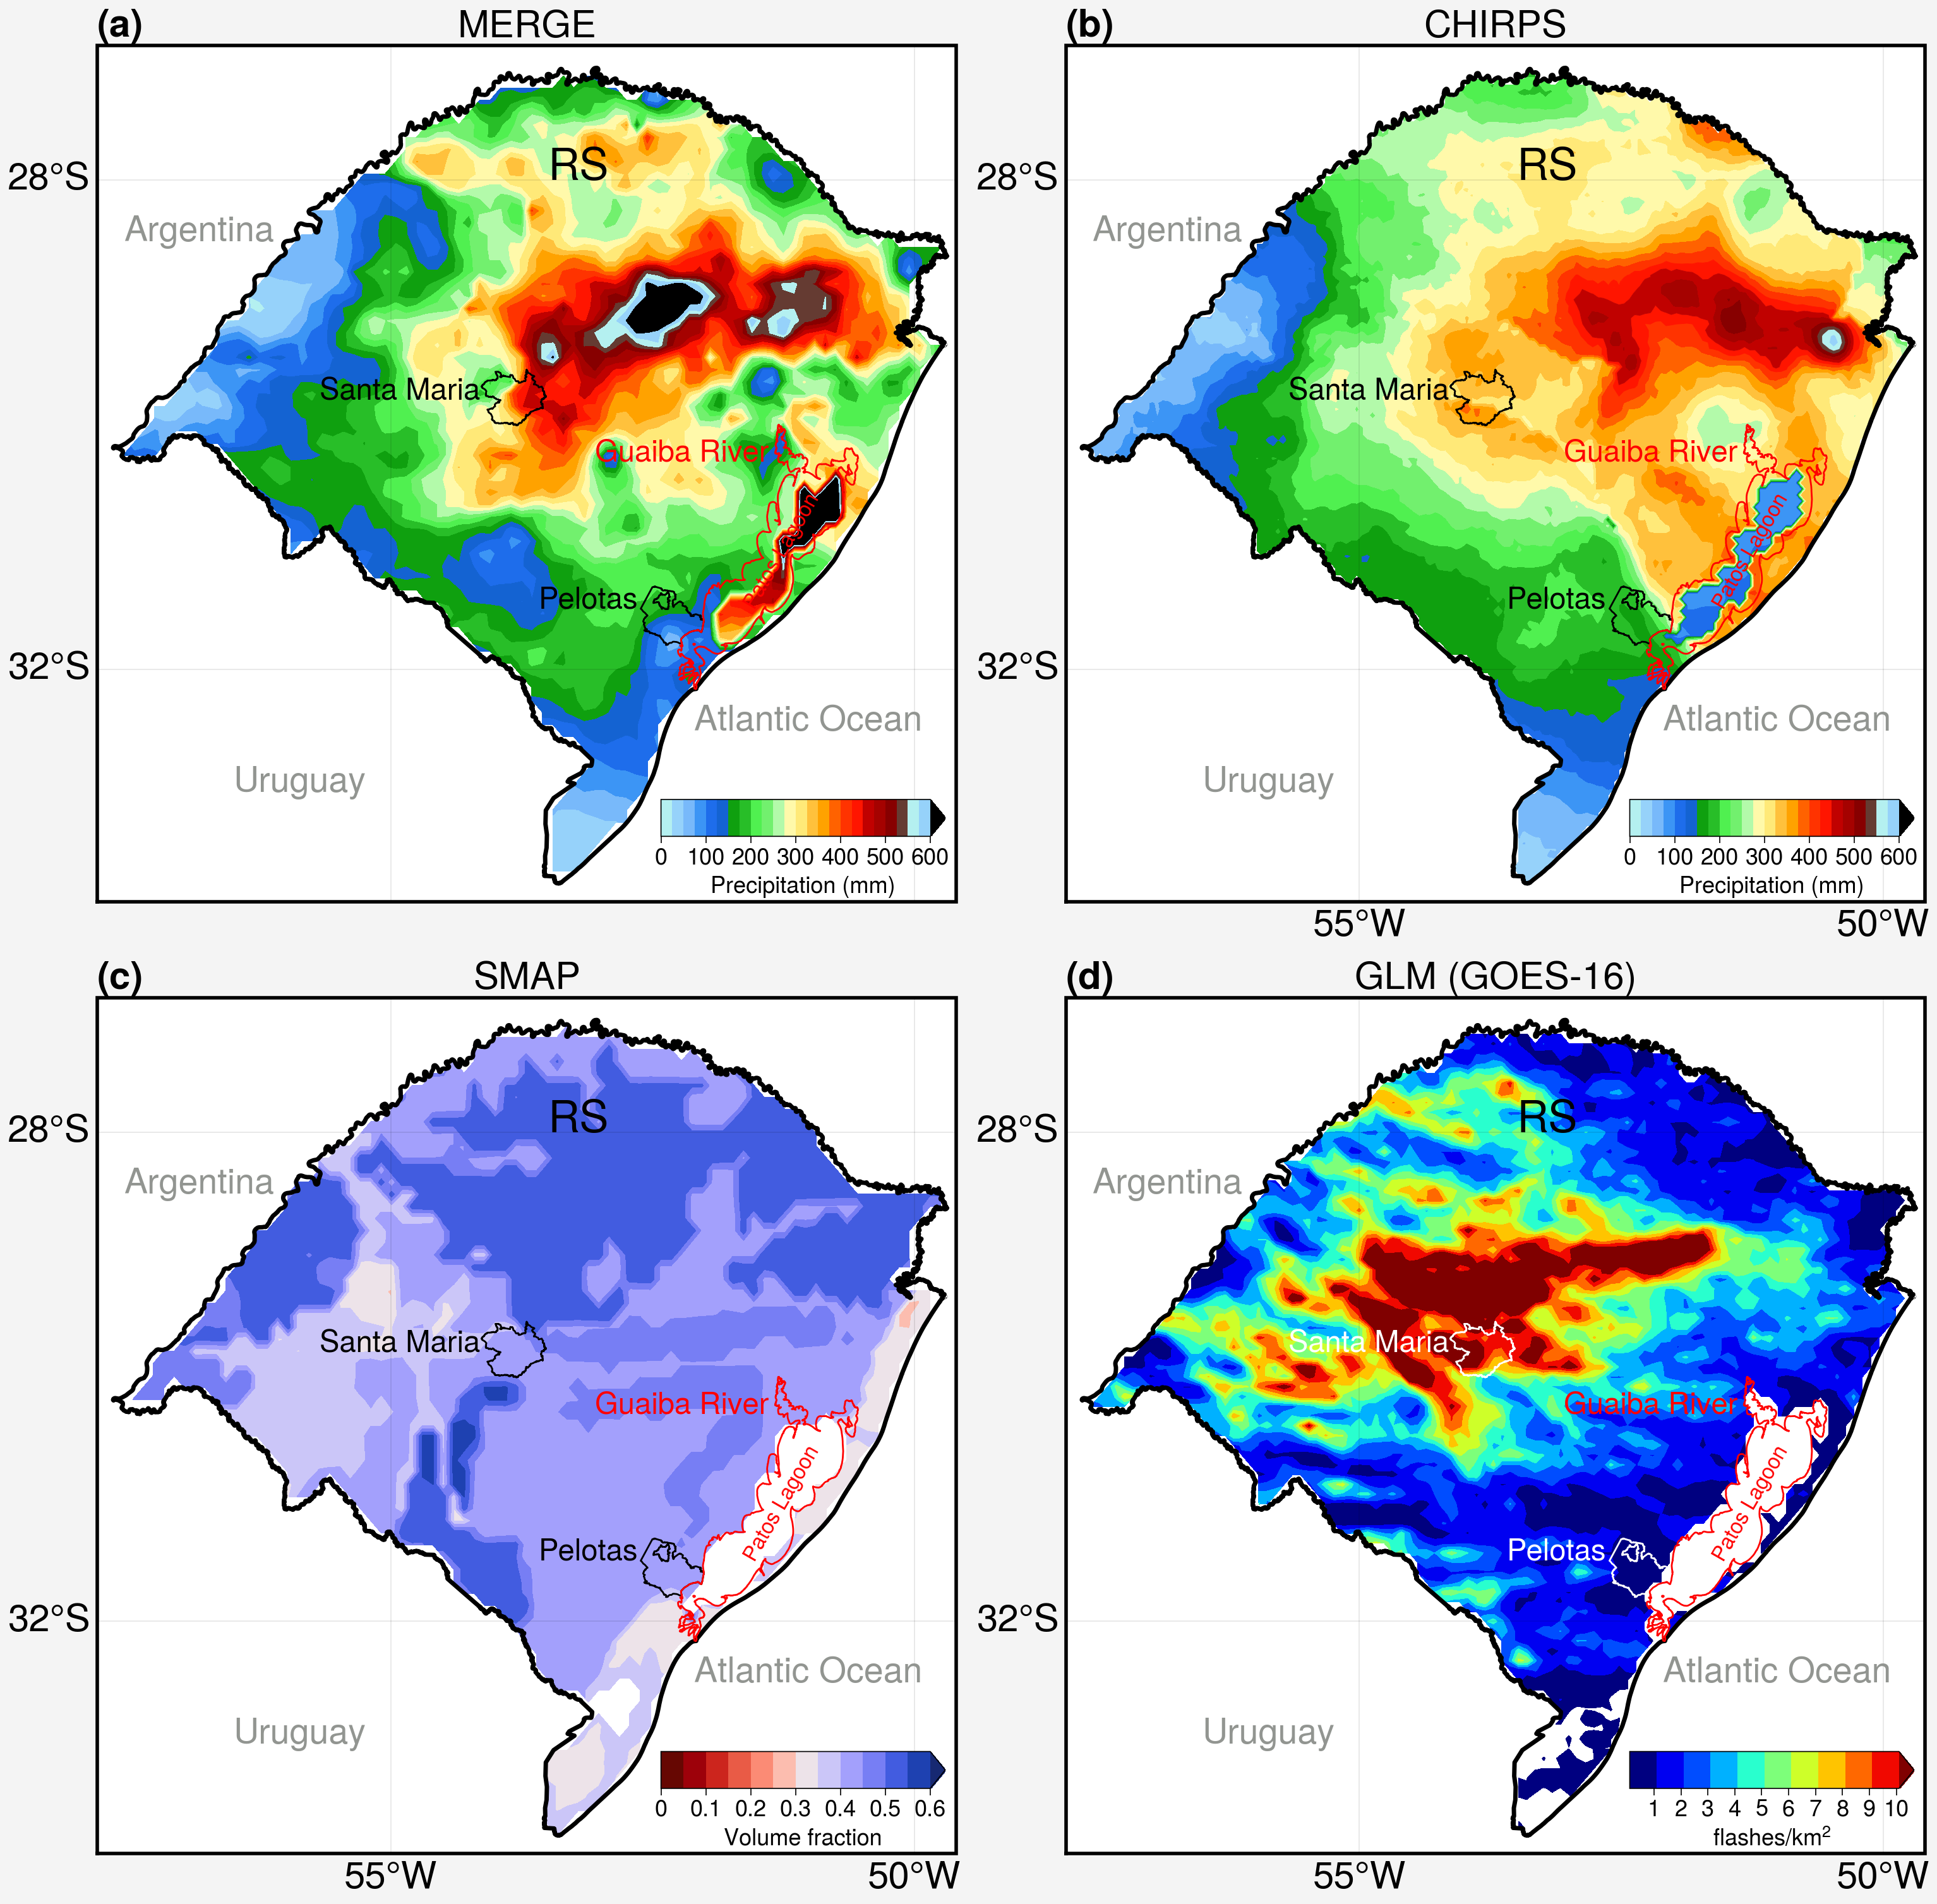

In [3]:
%%time
#========================================================================================================================#
#                                             CARREGA SHAPEFILES
#========================================================================================================================#
# leitura dos estados
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')

# selecionando os contorno do RS
rs = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == 'RS')]

# selecionando os contornos dos Estados no mapa
#estados_mapa = estados_brasil.loc[(estados_brasil['SIGLA_UF'] == 'RS') | (estados_brasil['SIGLA_UF'] == 'SC')]
estados_mapa = estados_brasil.loc[(estados_brasil['SIGLA_UF'] == 'RS')]

# municípios
municipios_rs = salem.read_shapefile('https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/RS_Municipios_2019.shp')

santa_maria = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Santa Maria')]
pelotas = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Pelotas')]
porto_alegre = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Porto Alegre')]
lagoa_patos = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Lagoa dos Patos')]
rio_guaiba = municipios_rs.loc[(municipios_rs['NM_MUN'] == 'Guaíba')]

#=========================================================================================#
#                                 DEFINE ARQUIVOS
#=========================================================================================#
# limites da imagem 
#lonmin, lonmax, latmin, latmax = -57.8, -49.0, -33.9, -26.5
lonmin, lonmax, latmin, latmax = -57.8, -49.6, -33.9, -26.9

# leitura dos shapefiles do Brasil 
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')
shapefile_rs = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/RS/RS_UF_2019.shp')

# caminho dos arquivos
file_chirps = 'dados_chirps/CHIRPS_OPENDAP_20230426_to_20230505.nc'
file_merge = 'dados_merge/MERGE_CPTEC_20240426_to_20240505_10km.nc'
file_smap = 'dados_smap/SPL4SMGP_007_SMAP_L4_20240426_to_20240505_11km.nc'
file_glm = 'dados_glm/FLASH_GOES16_20240426_to_20240505.nc'

# leitura dos netcdf
ds_chirps = xr.open_dataset(file_chirps).sel(longitude=slice(lonmin,lonmax), latitude=slice(latmin,latmax))
ds_merge = xr.open_dataset(file_merge).sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax))
ds_smap = xr.open_dataset(file_smap).sel(x=slice(lonmin,lonmax), y=slice(latmax,latmin))
ds_glm = xr.open_dataset(file_glm).sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax))

#==================================================================================================#
#                              DEFINIÇÕES DO GRÁFICO
#==================================================================================================#
# cria moldura da figura
fig, ax = pplt.subplots(ncols=2, nrows=2, axheight=6.8, axwidth=6.8, tight=True, proj='pcarree')

# formata os eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=4, lonlines=5,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          abc=True, abcstyle='(a)', abcsize=5,
          small='30px', large='30px',
          linewidth=2)

#==================================================================================================#
#                                       PLOTA FIGURA
#==================================================================================================#
# define as 24 cores da paleta de PRECIPITAÇÃO
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

# carrega a paleta de cores através do cmap
cmap = matplotlib.colors.ListedColormap(colors)

# seta a cor para valores acima do valor máximo
cmap.set_over('#000000')

# seta a cor para valores abaixo do valor mínimo
cmap.set_under('#aaaaaa')

#--------------------------------------------------------#
#                        MERGE
#--------------------------------------------------------#
# plota mapa
map1 = ax[0].contourf(ds_merge['lon'],
                      ds_merge['lat'],
                      ds_merge['rain'][:,:].salem.roi(shape=shapefile_rs),
                      cmap=cmap, 
                      vmin=0, vmax=600,
                      levels=pplt.arange(0, 600, 25),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Precipitation (mm)',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 13,
                                   'labelsize': 13,
                                   'width': 2,
                                   'ticks': 100,
                                   'location': 'best'})

# plota titulo de cada figura
ax[0].format(title='MERGE', labels=[True, False, False, False])

# plota sigla dos estados
plot_siglas_statesb()

# Estados
estados_mapa.plot(edgecolor='black', facecolor='none', linewidth=2.5, alpha=1, ax=ax[0])

# Santa Maria
santa_maria.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[0])
ax[0].annotate('Santa Maria', xy=(-55.68, -29.8), fontsize=17, color='black', rotation=0)

# Pelotas
pelotas.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[0])
ax[0].annotate('Pelotas', xy=(-53.59, -31.5), fontsize=17, color='black', rotation=0)

# Lagoa dos Patos
lagoa_patos.plot(edgecolor='red', facecolor='none', linewidth=1.0, alpha=1, ax=ax[0])
ax[0].annotate('Patos Lagoon', xy=(-51.65, -31.5), fontsize=12, color='red', rotation=60)

# Nome Rio Guaíba
ax[0].annotate('Guaiba River', xy=(-53.05, -30.3), fontsize=17, color='red', rotation=0)

#--------------------------------------------------------#
#                        CHIRPS
#--------------------------------------------------------#
# plota mapa
map2 = ax[1].contourf(ds_chirps['longitude'],
                      ds_chirps['latitude'],
                      ds_chirps['precip'][:,:].salem.roi(shape=shapefile_rs),
                      cmap=cmap, 
                      vmin=0, vmax=600,
                      levels=pplt.arange(0, 600, 25),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Precipitation (mm)',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 13,
                                   'labelsize': 13,
                                   'width': 2,
                                   'ticks': 100,
                                   'location': 'best'})

# plota titulo de cada figura
ax[1].format(title='CHIRPS', labels=False)

# Estados
estados_mapa.plot(edgecolor='black', facecolor='none', linewidth=2.5, alpha=1, ax=ax[1])

# Santa Maria
santa_maria.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[1])
ax[1].annotate('Santa Maria', xy=(-55.68, -29.8), fontsize=17, color='black', rotation=0)

# Pelotas
pelotas.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[1])
ax[1].annotate('Pelotas', xy=(-53.59, -31.5), fontsize=17, color='black', rotation=0)

# Lagoa dos Patos
lagoa_patos.plot(edgecolor='red', facecolor='none', linewidth=1.0, alpha=1, ax=ax[1])
ax[1].annotate('Patos Lagoon', xy=(-51.65, -31.5), fontsize=12, color='red', rotation=60)

# Nome Rio Guaíba
ax[1].annotate('Guaiba River', xy=(-53.05, -30.3), fontsize=17, color='red', rotation=0)

#--------------------------------------------------------#
#                        SMAP
#--------------------------------------------------------#
# plota mapa
map3 = ax[2].contourf(ds_smap['x'],
                      ds_smap['y'],
                      ds_smap['sm_surface'][0,:,:].salem.roi(shape=shapefile_rs),
                      cmap='BR_r',
                      vmin=0, vmax=0.6,
                      levels=pplt.arange(0, 0.6, 0.05),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Volume fraction',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 13,
                                   'labelsize': 13,
                                   'width': 2,
                                   'ticks': 0.1,
                                   'location': 'best'})

# plota titulo de cada figura
ax[2].format(title='SMAP', labels=[True, False, True, False])

# Estados
estados_mapa.plot(edgecolor='black', facecolor='none', linewidth=2.5, alpha=1, ax=ax[2])

# Santa Maria
santa_maria.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[2])
ax[2].annotate('Santa Maria', xy=(-55.68, -29.8), fontsize=17, color='black', rotation=0)

# Pelotas
pelotas.plot(edgecolor='black', facecolor='none', linewidth=1.0, alpha=1, ax=ax[2])
ax[2].annotate('Pelotas', xy=(-53.59, -31.5), fontsize=17, color='black', rotation=0)

# Lagoa dos Patos
lagoa_patos.plot(edgecolor='red', facecolor='none', linewidth=1.0, alpha=1, ax=ax[2])
ax[2].annotate('Patos Lagoon', xy=(-51.65, -31.5), fontsize=12, color='red', rotation=60)

# Nome Rio Guaíba
ax[2].annotate('Guaiba River', xy=(-53.05, -30.3), fontsize=17, color='red', rotation=0)

#--------------------------------------------------------#
#                        GLM
#--------------------------------------------------------#
# plota mapa
map4 = ax[3].contourf(ds_glm['lon'],
                      ds_glm['lat'],
                      (ds_glm['flash'][:,:]/64.).salem.roi(shape=shapefile_rs),
                      cmap='jet',
                      vmin=0.1, vmax=10,
                      levels=pplt.arange(0.1, 10, 1),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'flashes/km$^{2}$',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 13,
                                   'labelsize': 13,
                                   'width': 2,
                                   'ticks': 1,
                                   'location': 'best'})

# plota titulo de cada figura
ax[3].format(title='GLM (GOES-16)', labels=[False, False, True, False])

# Estados
estados_mapa.plot(edgecolor='black', facecolor='none', linewidth=2.5, alpha=1, ax=ax[3])

# Santa Maria
santa_maria.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax[3])
ax[3].annotate('Santa Maria', xy=(-55.68, -29.8), fontsize=17, color='white', rotation=0)

# Pelotas
pelotas.plot(edgecolor='white', facecolor='none', linewidth=1.0, alpha=1, ax=ax[3])
ax[3].annotate('Pelotas', xy=(-53.59, -31.5), fontsize=17, color='white', rotation=0)

# Lagoa dos Patos
lagoa_patos.plot(edgecolor='red', facecolor='none', linewidth=1.0, alpha=1, ax=ax[3])
ax[3].annotate('Patos Lagoon', xy=(-51.65, -31.5), fontsize=12, color='red', rotation=60)

# Nome Rio Guaíba
ax[3].annotate('Guaiba River', xy=(-53.05, -30.3), fontsize=17, color='red', rotation=0)

#==================================================================================================#
#                                     SALVA FIGURA
#==================================================================================================#
fig.save('Fig_3_chirps_merge_smap_glm_proof.jpg', dpi=300)